In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [32]:
df = pd.read_csv('C:/Users/a/Desktop/machine learning practice/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [33]:
df.shape

(2416, 7)

In [34]:
df.drop('Adj Close',1, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB


In [36]:
df.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


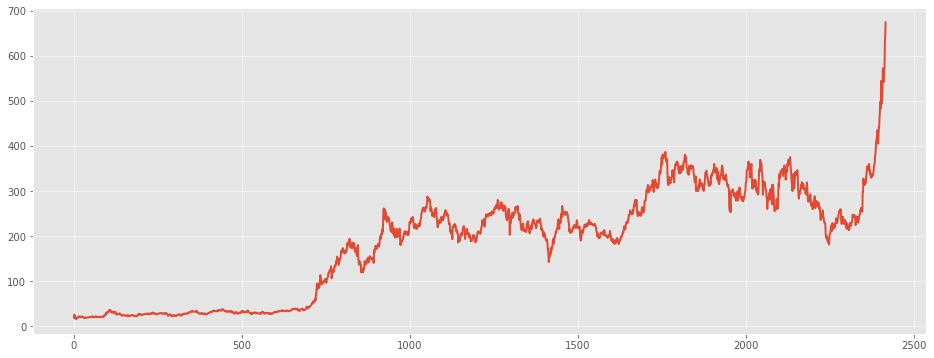

In [37]:
df['Open'].plot(figsize=(16,6))

In [38]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [40]:
X_train.shape,y_train.shape

((1812, 4), (1812,))

In [42]:
X_test.shape

(604, 4)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
regressor = LinearRegression()

In [45]:
regressor.fit(X_train,y_train)

LinearRegression()

In [46]:
regressor.coef_

array([-6.39634305e-01,  9.11543017e-01,  7.26604894e-01, -1.55475449e-08])

In [47]:
regressor.intercept_

-0.062448693353616136

In [48]:
predicted = regressor.predict(X_test)

In [49]:
X_test

,Open,High,Low,Volume
966,207.080002,214.020004,205.690002,5439900
557,27.900000,28.580000,27.799999,1145200
148,24.879999,24.879999,23.750000,1048400
1917,343.309998,348.619995,314.600006,10314600
1585,200.500000,200.899994,197.050003,2494600
...,...,...,...,...
1636,214.880005,222.250000,214.419998,5915700
1948,307.339996,307.589996,291.359985,8375200
2348,297.720001,330.000000,296.109985,30006100
1190,198.500000,200.500000,197.470001,2631600


In [50]:
predicted.shape

(604,)

In [52]:
df2 = pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})

In [53]:
df2

,Actual Price,Predicted Price
966,207.729996,211.941303
557,28.280001,28.325464
148,24.010000,23.943206
1917,315.230011,326.556359
1585,200.240005,197.958571
...,...,...
1636,219.529999,220.790009
1948,304.179993,295.307237
2348,328.130005,325.003264
1190,199.630005,199.176271


In [63]:
graph = df2.head()

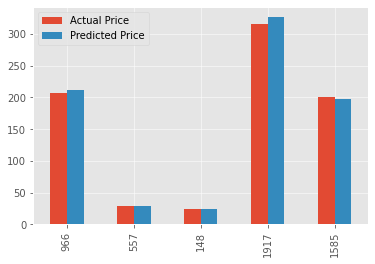

In [65]:
graph.plot(kind='bar')

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [55]:
regressor.score(X_test,y_test)

0.9996847995137271

In [56]:
import math

In [58]:
from sklearn import metrics

In [60]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 1.3958905895071794


In [61]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 4.421255297165181


In [62]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 2.1026781249552156
